In [21]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

## Load the clean BASMI data

This dataset is a pivoted version of the BASMI data, and also contains information about which drug the patient was using at the time.

In [78]:
basmi_df = pd.read_excel('data/clean_basmi.xls', index_col=(0,1))
basmi_df.head()

CRS  TWS  LSFS  LFS  IMS   BS Drug
patient_id Date                                          
40         1995-05-09    3    1     6    5    3  3.6  NaN
           1995-06-01    3    1     8    5    3  4.0  NaN
           1995-06-12    2    1     5    3    2  2.6  NaN
           1995-11-02    1    1     3    4    2  2.2  NaN
           1996-05-02    2    1     4    3    2  2.4  NaN

In [12]:
# Demographics DataFrame
demo_df = pd.read_excel('data/demographics and Biologics data.xlsx')
demo_df.head()

,patient_id,patient_gender_id,patient_date_of_diagnosis,Age at diagnosis,patient_hla_bUnknown7_id,EIBP,patient_condition_subtype,Current biologic,Number of biologics used (not including brand/biosimilar switch),year of Birth
0,40,Female,1994-01-01,46.255989,Positive,False,AS,Infliximab,1,1947
1,41,Male,2003-01-01,46.644764,Positive,False,AS,Adalimumab,1,1956
2,43,Male,1978-01-01,20.410678,Positive,False,AS,Adalimumab,1,1957
3,44,Male,1994-01-01,22.047912,Unknown,False,AS,Adalimumab,1,1971
4,45,Male,1998-01-01,37.048597,Positive,False,AS,Etanercept,1,1960


In [13]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 10 columns):
patient_id                                                          721 non-null int64
patient_gender_id                                                   721 non-null object
patient_date_of_diagnosis                                           682 non-null datetime64[ns]
Age at diagnosis                                                    680 non-null float64
patient_hla_bUnknown7_id                                            721 non-null object
EIBP                                                                721 non-null bool
patient_condition_subtype                                           721 non-null object
Current biologic                                                    721 non-null object
Number of biologics used (not including brand/biosimilar switch)    720 non-null object
year of Birth                                                       721 non-null int64
dtypes: bo

### Deal with missing values

So, we see that the dataset has some missing values...Lets remove all rows with any missing values from the dataset..

In [18]:
demo_df.dropna(how='any',inplace=True)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 0 to 720
Data columns (total 10 columns):
patient_id                                                          679 non-null int64
patient_gender_id                                                   679 non-null object
patient_date_of_diagnosis                                           679 non-null datetime64[ns]
Age at diagnosis                                                    679 non-null float64
patient_hla_bUnknown7_id                                            679 non-null object
EIBP                                                                679 non-null bool
patient_condition_subtype                                           679 non-null object
Current biologic                                                    679 non-null object
Number of biologics used (not including brand/biosimilar switch)    679 non-null object
year of Birth                                                       679 non-null int64
dtypes: bo

### Descriptive Stats

Now, lets look at some descriptive statistics.

#### Age distribution

First, lets take a look at the age distribution. Because age naturally changes over time, we will use the age at first diagnosis - ie the age at which the patient entered the study. 

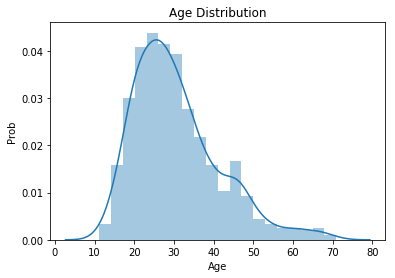

In [32]:
age_at_entry = demo_df['Age at diagnosis'].values

ax = sns.distplot(age_at_entry)
title = ax.set_title('Age Distribution')
xlabel = ax.set_xlabel('Age')
ylabel = ax.set_ylabel('Prob')

#### Gender

Lets look at the gender distribution and also some basic stats on the BASMI score for each gender group

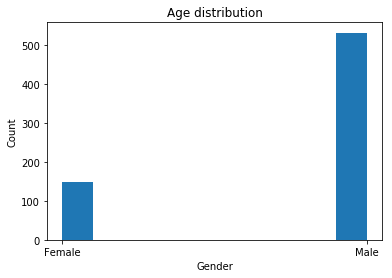

In [41]:
genders = demo_df['patient_gender_id']

# First plot the distribution
fig = plt.figure()
plt.hist(genders)
plt.title('Age distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [88]:
# Get some stats about male and female patients
male_ids = demo_df[genders == 'Male']['patient_id']
female_ids = demo_df[genders == 'Female']['patient_id']

idx = pd.IndexSlice

# Most probably not the best way to do this, but whatever
male_basmi_df = basmi_df.reset_index().set_index('patient_id').loc[male_ids]
female_basmi_df = basmi_df.reset_index().set_index('patient_id').loc[female_ids]

# Get the average BS score for each male patient
# TODO - Check the averaging method with LUCA
avg_male_bs_df = male_basmi_df.groupby(male_basmi_df.index).agg({'BS': 'mean'})
avg_female_bs_df = female_basmi_df.groupby(female_basmi_df.index).agg({'BS': 'mean'})

# Now get the average BS score over all male and female patients
print('Male BS Score Information:\n')
print(avg_male_bs_df.describe())

print('\n\nFemale BS Score Information:\n')
print(avg_female_bs_df.describe())

Male BS Score Information:

               BS
count  521.000000
mean     3.711261
std      2.008204
min      0.155556
25%      2.010256
50%      3.652941
75%      5.288889
max      8.122581


Female BS Score Information:

               BS
count  142.000000
mean     2.874123
std      1.760230
min      0.400000
25%      1.417500
50%      2.524286
75%      4.152690
max      8.000000
